### Statistical Analysis & Understanding Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from utils import (encode_features, scale_features,
                   look_for_outliers,handle_outliers_iqr,
                   treat_skewness)
# from google.colab import drive

In [2]:
# drive.mount('/content/drive')

In [3]:
df = pd.read_csv("data/train data.csv")
df.head()

,ID,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,1,Bobby JacksOn,27,Female,O-,Asthma,06/06/2022,Mark Hartman Jr.,Sons and Miller,Cigna,2625.980554,379,Elective,18/08/2022,Ibuprofen,Normal
1,2,LesLie TErRy,68,Female,O-,Cancer,19/11/2021,Angela Contreras,White-White,Cigna,1471.387317,113,Elective,20/11/2021,Ibuprofen,Inconclusive
2,3,DaNnY sMitH,21,Female,A+,Hypertension,05/03/2022,David Ruiz,Group Middleton,Medicare,5131.488104,154,Emergency,16/05/2022,Paracetamol,Normal
3,4,andrEw waTtS,91,Male,AB-,Diabetes,06/04/2020,Jenny Griffith,Morris-Arellano,Blue Cross,8972.793157,293,Urgent,26/04/2020,Ibuprofen,Abnormal
4,5,adrIENNE bEll,52,Female,A+,Diabetes,31/12/2022,Cynthia Scott,Williams-Davis,Blue Cross,2015.522684,265,Emergency,11/02/2023,Penicillin,Abnormal


In [4]:
df.tail()

,ID,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
49995,49996,JOSepH PaUl,42,Female,B-,Asthma,24/09/2021,Donna Martinez MD,Houston PLC,Cigna,5569.504046,119,Urgent,14/10/2021,Paracetamol,Inconclusive
49996,49997,braDleY dAniEL,43,Male,A-,Asthma,21/09/2020,John Duncan,"Powers Miller, and Flores",Cigna,5190.988559,470,Urgent,28/09/2020,Aspirin,Abnormal
49997,49998,LiSa sIMPsoN,72,Female,O+,Hypertension,19/08/2019,Timothy Baker,Schaefer-Porter,Blue Cross,181.636485,425,Urgent,10/10/2019,Aspirin,Abnormal
49998,49999,RoGER farRELl,10,Female,AB-,Cancer,01/05/2024,Rose Zuniga,Nunez-Humphrey,Aetna,1398.821577,205,Urgent,06/06/2024,Penicillin,Abnormal
49999,50000,kaTheRIne WeBSTer,0,Male,O+,Obesity,28/10/2022,Lisa Edwards,White-White,Aetna,4570.610507,338,Urgent,01/01/2023,Aspirin,Inconclusive


In [5]:
df.isnull().sum()

ID                       0
Name                     0
Age                      0
Gender                   0
Blood Type            3065
Medical Condition        0
Date of Admission        0
Doctor                 804
Hospital               959
Insurance Provider     293
Billing Amount         724
Room Number              0
Admission Type         181
Discharge Date           0
Medication               0
Test Results             0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  50000 non-null  int64  
 1   Name                50000 non-null  object 
 2   Age                 50000 non-null  int64  
 3   Gender              50000 non-null  object 
 4   Blood Type          46935 non-null  object 
 5   Medical Condition   50000 non-null  object 
 6   Date of Admission   50000 non-null  object 
 7   Doctor              49196 non-null  object 
 8   Hospital            49041 non-null  object 
 9   Insurance Provider  49707 non-null  object 
 10  Billing Amount      49276 non-null  float64
 11  Room Number         50000 non-null  int64  
 12  Admission Type      49819 non-null  object 
 13  Discharge Date      50000 non-null  object 
 14  Medication          50000 non-null  object 
 15  Test Results        50000 non-null  object 
dtypes: f

In [7]:
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

Dataset contains 50000 rows and 16 columns.


In [8]:
#Summarize categorical columns:
for col in df.select_dtypes(include='object').columns:
    print(f"Value counts for {col}:\n{df[col].value_counts()}\n")

Value counts for Name:
Name
DAvId muNoZ          2
PAUL SMith           2
TInA white           2
LOrI coOK            2
DAniEl sMIth         2
                    ..
adrIAn LynCh         1
NanCY DAughERtY      1
ryaN moss            1
MERcEdes garCIa      1
kaTheRIne WeBSTer    1
Name: count, Length: 49992, dtype: int64

Value counts for Gender:
Gender
Female    28514
Male      21486
Name: count, dtype: int64

Value counts for Blood Type:
Blood Type
B-     12338
A+      6873
O-      5833
AB-     5739
AB+     4970
O+      4556
A-      3348
B+      3278
Name: count, dtype: int64

Value counts for Medical Condition:
Medical Condition
Asthma          11485
Obesity         10908
Cancer           9185
Hypertension     7470
Diabetes         6802
Arthritis        4150
Name: count, dtype: int64

Value counts for Date of Admission:
Date of Admission
31/03/2024    41
19/04/2023    39
12/05/2023    39
27/05/2022    39
06/02/2021    38
              ..
31/03/2021    12
12/10/2020    11
15/03/2024  

In [9]:
for col in df.columns:
        num_unique = df[col].nunique()
        print(f"Column '{col}' has {num_unique} unique values.")

Column 'ID' has 50000 unique values.
Column 'Name' has 49992 unique values.
Column 'Age' has 101 unique values.
Column 'Gender' has 2 unique values.
Column 'Blood Type' has 8 unique values.
Column 'Medical Condition' has 6 unique values.
Column 'Date of Admission' has 2101 unique values.
Column 'Doctor' has 217 unique values.
Column 'Hospital' has 60 unique values.
Column 'Insurance Provider' has 5 unique values.
Column 'Billing Amount' has 49276 unique values.
Column 'Room Number' has 451 unique values.
Column 'Admission Type' has 3 unique values.
Column 'Discharge Date' has 2190 unique values.
Column 'Medication' has 5 unique values.
Column 'Test Results' has 3 unique values.


In [10]:
print(f"Number of duplicate rows: {df.duplicated().sum()}")
# View the duplicated rows
duplicated_rows = df[df.duplicated()]
print("\nDuplicated rows:")
print(duplicated_rows)

Number of duplicate rows: 0

Duplicated rows:
Empty DataFrame
Columns: [ID, Name, Age, Gender, Blood Type, Medical Condition, Date of Admission, Doctor, Hospital, Insurance Provider, Billing Amount, Room Number, Admission Type, Discharge Date, Medication, Test Results]
Index: []


In [11]:
# 1. Descriptive statistics for numeric columns
numeric_desc = df.describe()
print("Descriptive Statistics (Numeric Columns):")
print(numeric_desc)

Descriptive Statistics (Numeric Columns):
                 ID           Age  Billing Amount   Room Number
count  50000.000000  50000.000000    49276.000000  50000.000000
mean   25000.500000     45.863700     5397.314987    282.999980
std    14433.901067     24.416119     3240.601901    109.993534
min        1.000000      0.000000     -995.211704     50.000000
25%    12500.750000     26.000000     2645.811489    203.000000
50%    25000.500000     45.000000     5313.507889    286.000000
75%    37500.250000     65.000000     8027.205893    370.000000
max    50000.000000    100.000000    12635.764460    500.000000


In [12]:
# 2. Frequency distribution for top 10 values in categorical variables
categorical_cols = df.select_dtypes(include='object').columns
print("\nFrequency Distribution (Top 10 per Categorical Column):")
for col in categorical_cols:
    print(f"\nTop values in '{col}':")
    print(df[col].value_counts().head(10))


Frequency Distribution (Top 10 per Categorical Column):

Top values in 'Name':
Name
DAvId muNoZ      2
PAUL SMith       2
TInA white       2
LOrI coOK        2
DAniEl sMIth     2
aMy smiTh        2
jaMES SmITH      2
ADAM OrR         2
SHAne EsCoBAr    1
nAThAN DIAz      1
Name: count, dtype: int64

Top values in 'Gender':
Gender
Female    28514
Male      21486
Name: count, dtype: int64

Top values in 'Blood Type':
Blood Type
B-     12338
A+      6873
O-      5833
AB-     5739
AB+     4970
O+      4556
A-      3348
B+      3278
Name: count, dtype: int64

Top values in 'Medical Condition':
Medical Condition
Asthma          11485
Obesity         10908
Cancer           9185
Hypertension     7470
Diabetes         6802
Arthritis        4150
Name: count, dtype: int64

Top values in 'Date of Admission':
Date of Admission
31/03/2024    41
19/04/2023    39
12/05/2023    39
27/05/2022    39
06/02/2021    38
03/04/2022    38
25/12/2021    37
09/02/2022    37
20/11/2021    37
14/06/2020    37
Nam

In [13]:
# 3. Correlation matrix for numerical features
print("\nCorrelation Matrix:")
correlation_matrix = df.corr(numeric_only=True)
print(correlation_matrix)


Correlation Matrix:
                      ID       Age  Billing Amount  Room Number
ID              1.000000  0.005001       -0.010553     0.002573
Age             0.005001  1.000000        0.010052     0.136172
Billing Amount -0.010553  0.010052        1.000000    -0.030675
Room Number     0.002573  0.136172       -0.030675     1.000000


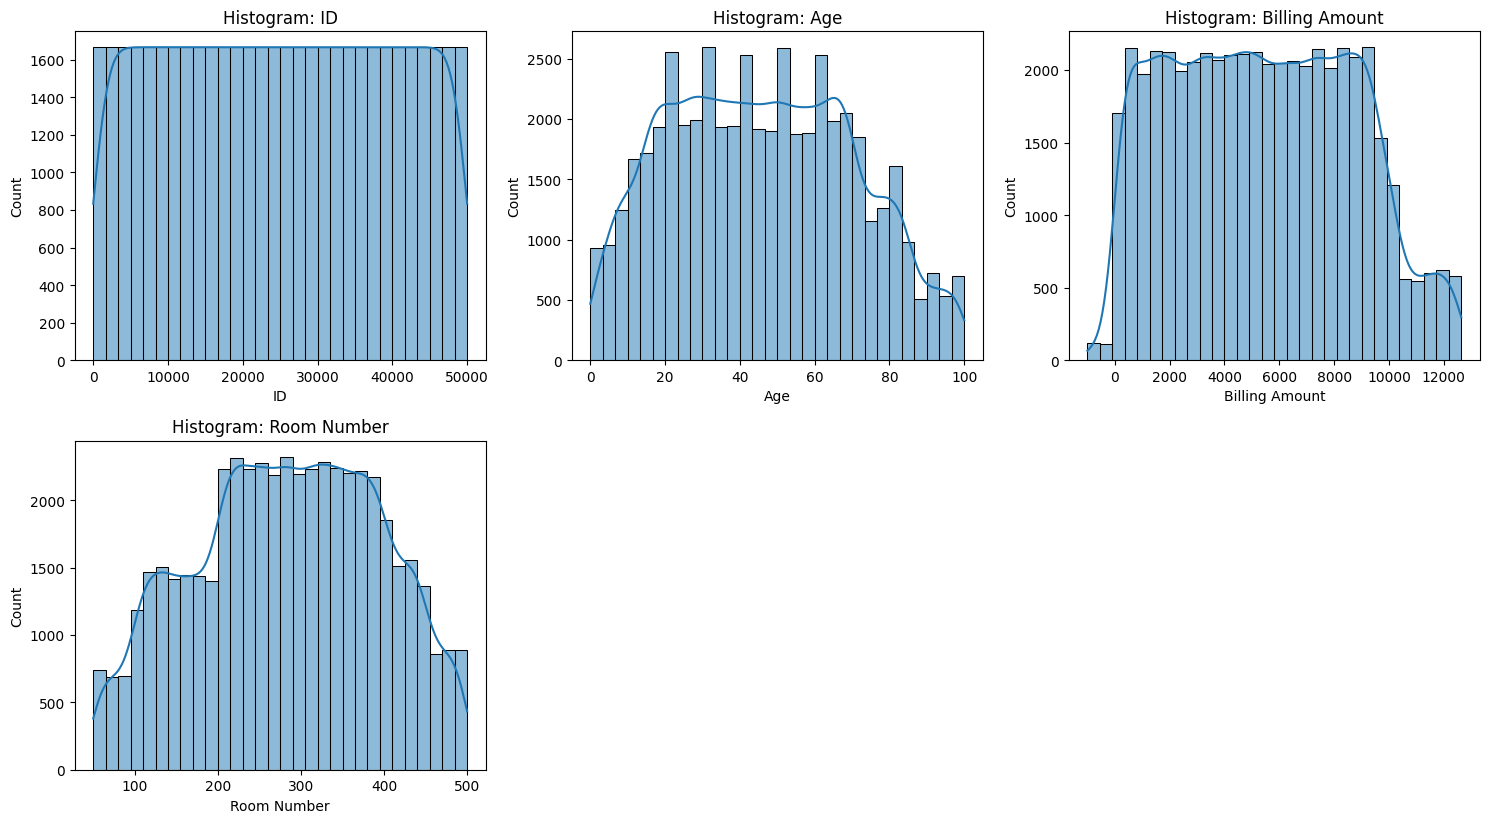

In [14]:
# 4. Distribution plots (Histograms) for numerical columns
numeric_cols = df.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(15, 12))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Histogram: {col}')
plt.tight_layout()
plt.show()

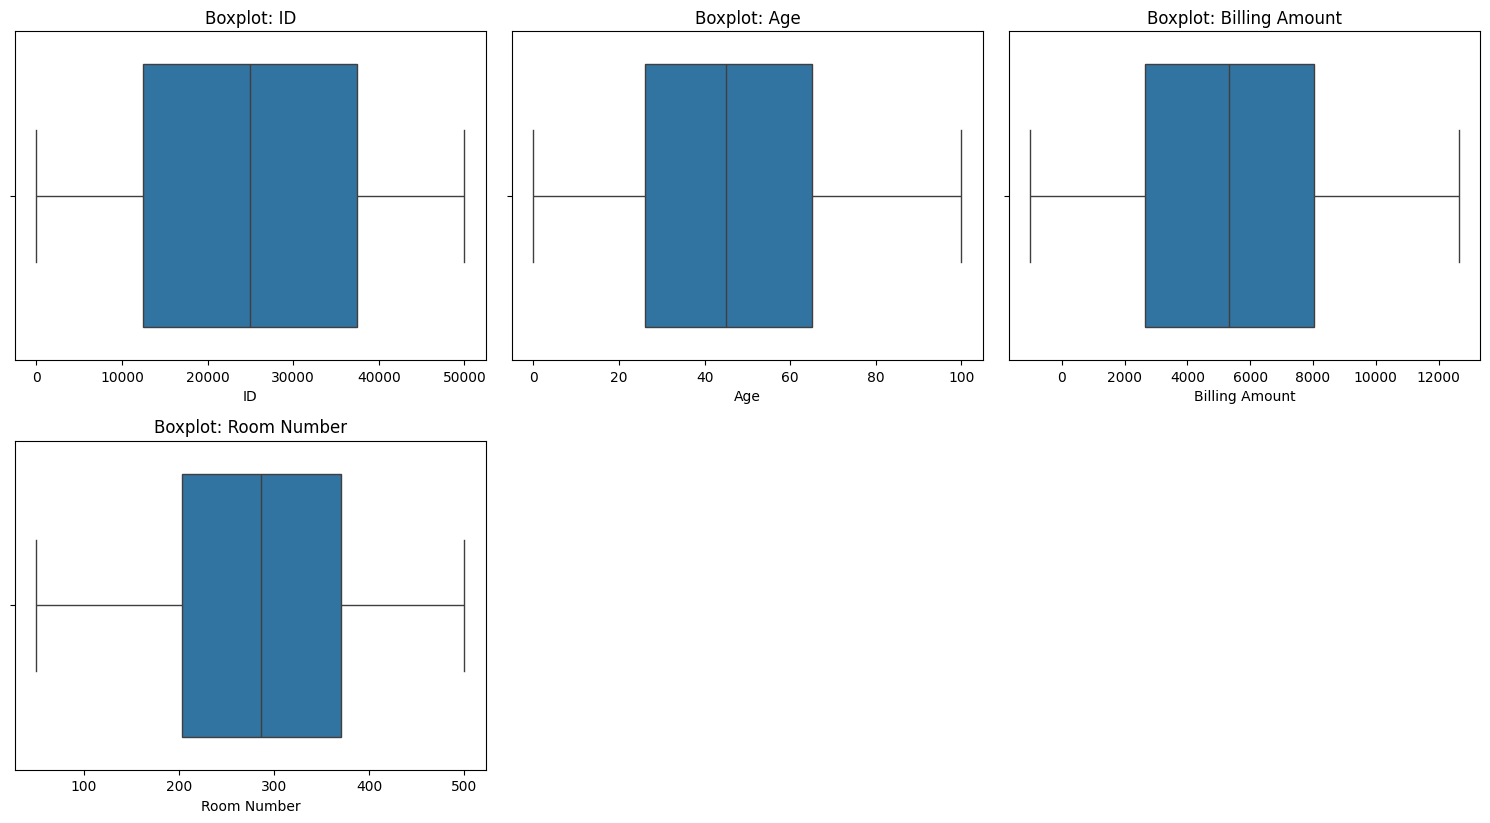

In [15]:
# 5. Boxplots for outlier detection
plt.figure(figsize=(15, 12))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot: {col}')
plt.tight_layout()
plt.show()

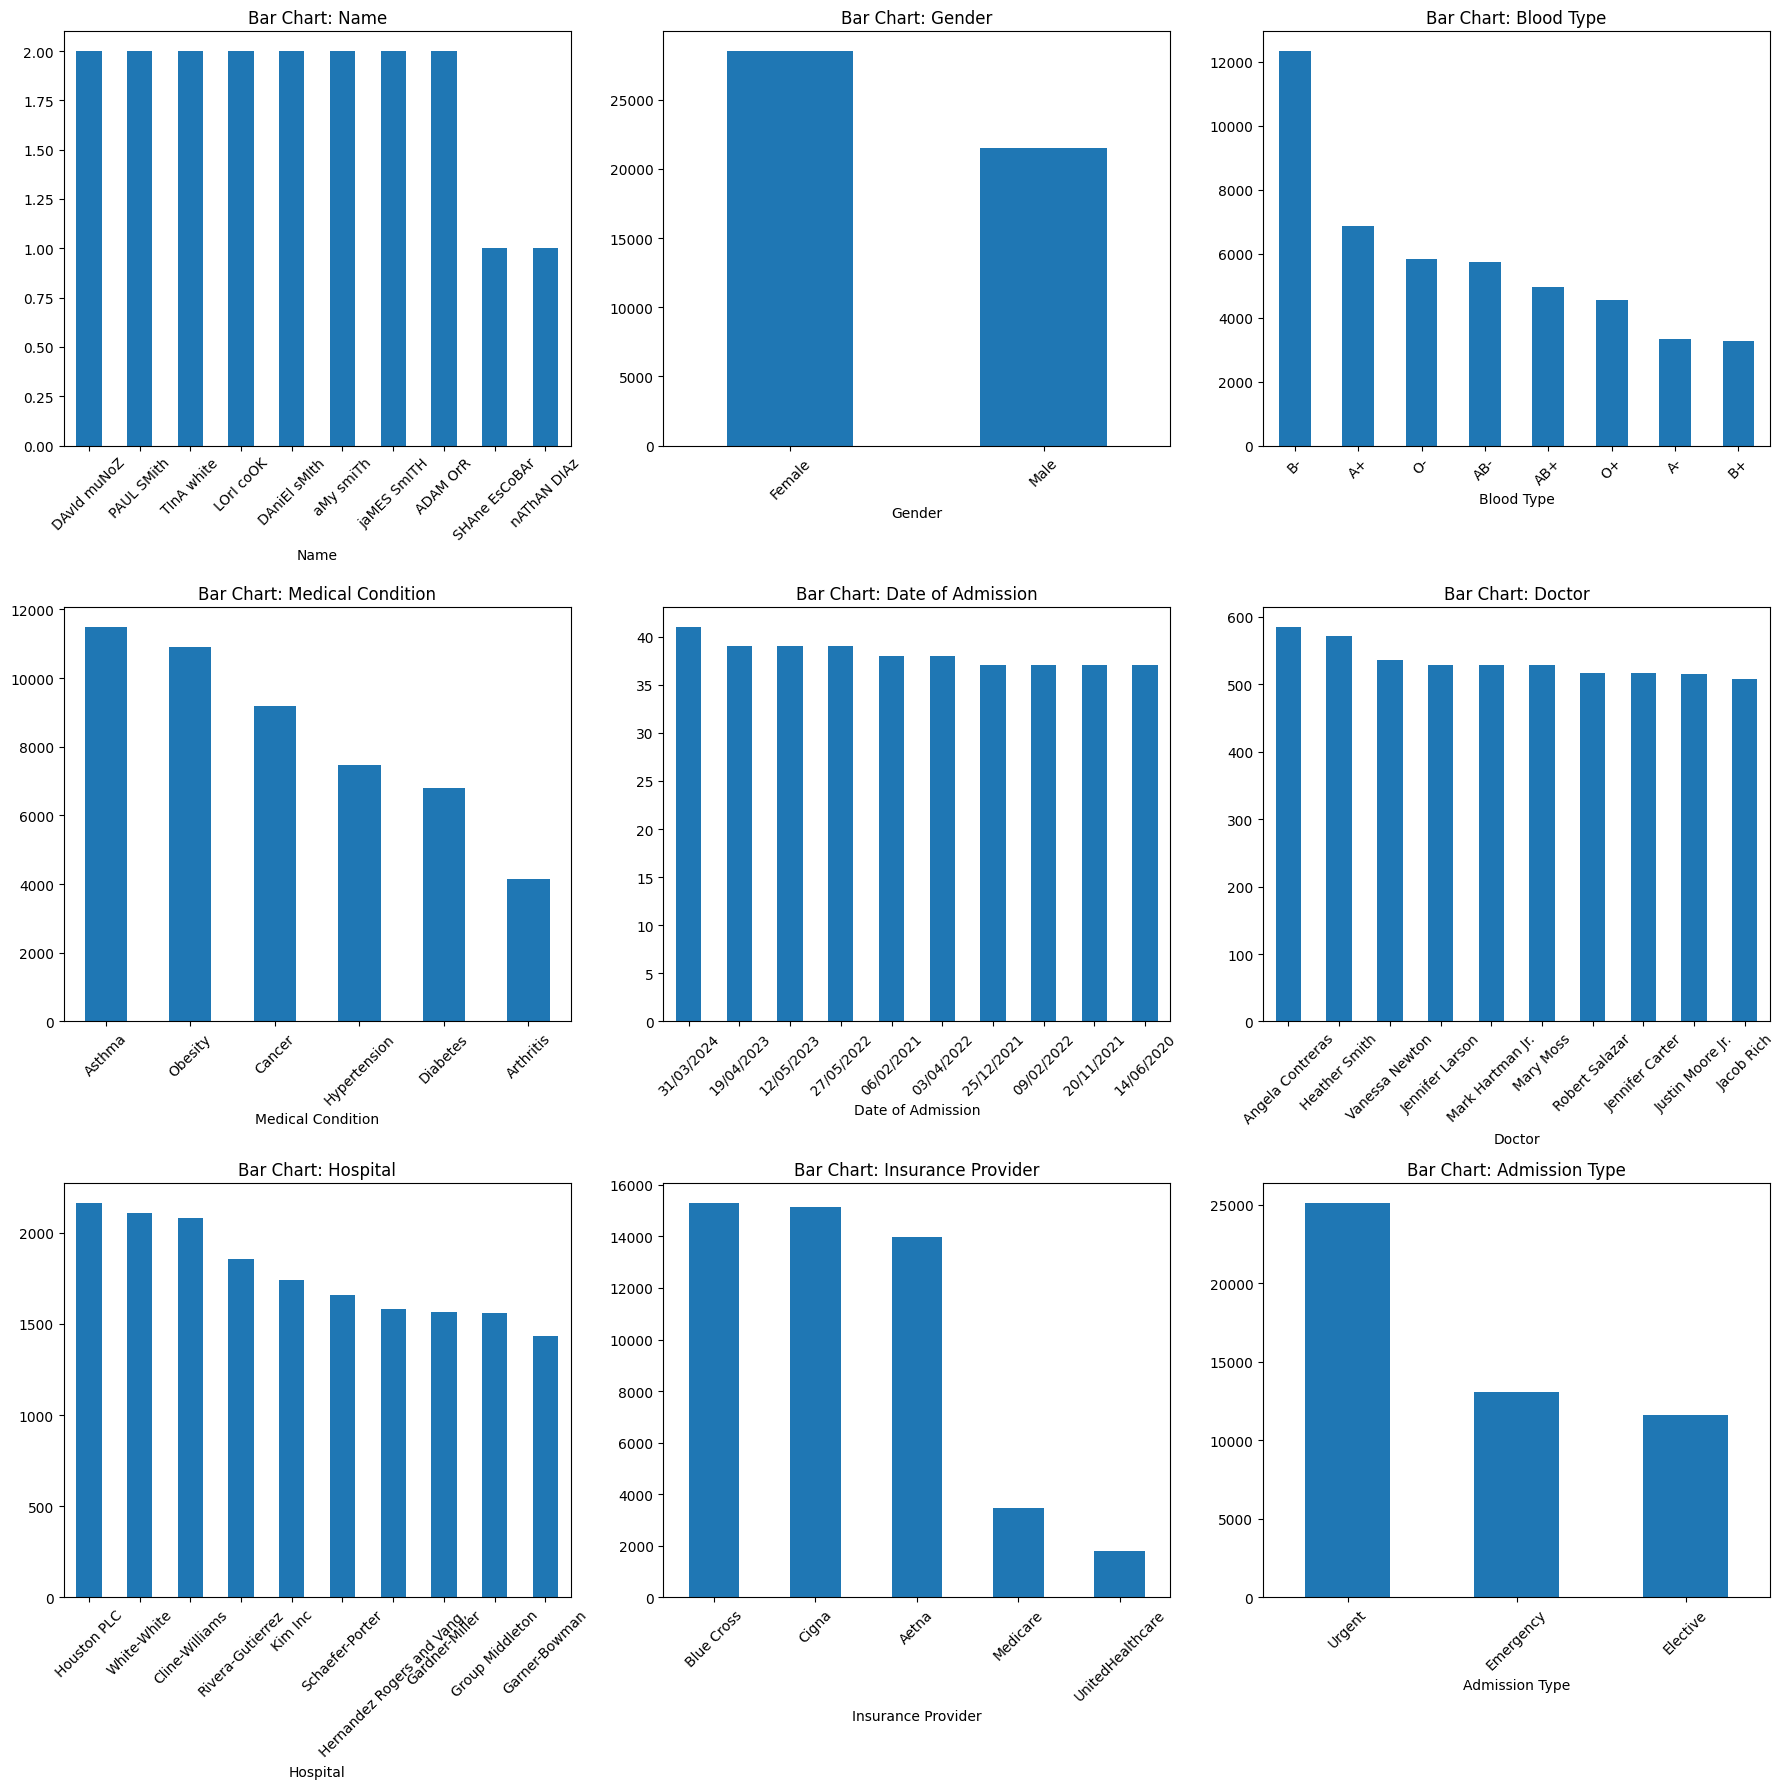

In [16]:
# 6. Bar charts for top categories
plt.figure(figsize=(18, 18))
for i, col in enumerate(categorical_cols[:9], 1):  # Limit to 9 for layout
    plt.subplot(3, 3, i)
    df[col].value_counts().head(10).plot(kind='bar')
    plt.title(f'Bar Chart: {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Preprocessing

In [17]:
# Step 1: Drop rows with any missing values
df_cleaned = df.dropna()

In [18]:
df_cleaned.isnull().sum()

ID                    0
Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

In [19]:
df_cleaned.head()

,ID,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,1,Bobby JacksOn,27,Female,O-,Asthma,06/06/2022,Mark Hartman Jr.,Sons and Miller,Cigna,2625.980554,379,Elective,18/08/2022,Ibuprofen,Normal
1,2,LesLie TErRy,68,Female,O-,Cancer,19/11/2021,Angela Contreras,White-White,Cigna,1471.387317,113,Elective,20/11/2021,Ibuprofen,Inconclusive
2,3,DaNnY sMitH,21,Female,A+,Hypertension,05/03/2022,David Ruiz,Group Middleton,Medicare,5131.488104,154,Emergency,16/05/2022,Paracetamol,Normal
3,4,andrEw waTtS,91,Male,AB-,Diabetes,06/04/2020,Jenny Griffith,Morris-Arellano,Blue Cross,8972.793157,293,Urgent,26/04/2020,Ibuprofen,Abnormal
4,5,adrIENNE bEll,52,Female,A+,Diabetes,31/12/2022,Cynthia Scott,Williams-Davis,Blue Cross,2015.522684,265,Emergency,11/02/2023,Penicillin,Abnormal


In [20]:
# Step 2: Standardize text-based categorical fields
df_cleaned['Name'] = df_cleaned['Name'].str.title()
df_cleaned['Gender'] = df_cleaned['Gender'].str.capitalize()
df_cleaned['Medical Condition'] = df_cleaned['Medical Condition'].str.capitalize()
df_cleaned['Doctor'] = df_cleaned['Doctor'].str.title()
df_cleaned['Hospital'] = df_cleaned['Hospital'].str.title()
df_cleaned['Insurance Provider'] = df_cleaned['Insurance Provider'].str.title()
df_cleaned['Medication'] = df_cleaned['Medication'].str.capitalize()
df_cleaned['Test Results'] = df_cleaned['Test Results'].str.capitalize()
df_cleaned['Admission Type'] = df_cleaned['Admission Type'].str.capitalize()


C:\Users\Fady\AppData\Local\Temp\ipykernel_1316\2601922767.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Name'] = df_cleaned['Name'].str.title()
C:\Users\Fady\AppData\Local\Temp\ipykernel_1316\2601922767.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Gender'] = df_cleaned['Gender'].str.capitalize()
C:\Users\Fady\AppData\Local\Temp\ipykernel_1316\2601922767.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

In [21]:
# Step 3: Convert date columns to datetime
df_cleaned["Date of Admission"] = pd.to_datetime(
    df_cleaned["Date of Admission"], errors="coerce", dayfirst=True
)
df_cleaned["Discharge Date"] = pd.to_datetime(
    df_cleaned["Discharge Date"], errors="coerce", dayfirst=True
)

C:\Users\Fady\AppData\Local\Temp\ipykernel_1316\3333625366.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["Date of Admission"] = pd.to_datetime(
C:\Users\Fady\AppData\Local\Temp\ipykernel_1316\3333625366.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["Discharge Date"] = pd.to_datetime(


In [22]:
df_cleaned.head()

,ID,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,1,Bobby Jackson,27,Female,O-,Asthma,2022-06-06,Mark Hartman Jr.,Sons And Miller,Cigna,2625.980554,379,Elective,2022-08-18,Ibuprofen,Normal
1,2,Leslie Terry,68,Female,O-,Cancer,2021-11-19,Angela Contreras,White-White,Cigna,1471.387317,113,Elective,2021-11-20,Ibuprofen,Inconclusive
2,3,Danny Smith,21,Female,A+,Hypertension,2022-03-05,David Ruiz,Group Middleton,Medicare,5131.488104,154,Emergency,2022-05-16,Paracetamol,Normal
3,4,Andrew Watts,91,Male,AB-,Diabetes,2020-04-06,Jenny Griffith,Morris-Arellano,Blue Cross,8972.793157,293,Urgent,2020-04-26,Ibuprofen,Abnormal
4,5,Adrienne Bell,52,Female,A+,Diabetes,2022-12-31,Cynthia Scott,Williams-Davis,Blue Cross,2015.522684,265,Emergency,2023-02-11,Penicillin,Abnormal


In [23]:
# Calculate Length of Stay
df_cleaned['Length of Stay'] = (df_cleaned['Discharge Date'] - df_cleaned['Date of Admission']).dt.days

# Reorder columns: insert 'Length of Stay' before 'Target'
target_index = df_cleaned.columns.get_loc('Test Results')
cols = list(df_cleaned.columns)
# Move 'Length of Stay' to the position before 'Target'
cols.insert(target_index, cols.pop(cols.index('Length of Stay')))
df_cleaned = df_cleaned[cols]

C:\Users\Fady\AppData\Local\Temp\ipykernel_1316\2531696295.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Length of Stay'] = (df_cleaned['Discharge Date'] - df_cleaned['Date of Admission']).dt.days


In [24]:
df_cleaned.head()

,ID,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Length of Stay,Test Results
0,1,Bobby Jackson,27,Female,O-,Asthma,2022-06-06,Mark Hartman Jr.,Sons And Miller,Cigna,2625.980554,379,Elective,2022-08-18,Ibuprofen,73,Normal
1,2,Leslie Terry,68,Female,O-,Cancer,2021-11-19,Angela Contreras,White-White,Cigna,1471.387317,113,Elective,2021-11-20,Ibuprofen,1,Inconclusive
2,3,Danny Smith,21,Female,A+,Hypertension,2022-03-05,David Ruiz,Group Middleton,Medicare,5131.488104,154,Emergency,2022-05-16,Paracetamol,72,Normal
3,4,Andrew Watts,91,Male,AB-,Diabetes,2020-04-06,Jenny Griffith,Morris-Arellano,Blue Cross,8972.793157,293,Urgent,2020-04-26,Ibuprofen,20,Abnormal
4,5,Adrienne Bell,52,Female,A+,Diabetes,2022-12-31,Cynthia Scott,Williams-Davis,Blue Cross,2015.522684,265,Emergency,2023-02-11,Penicillin,42,Abnormal


In [25]:
#Checking the percentage of the missing data
pd.set_option('display.max_rows', None)
missing_percentage = (df_cleaned.isnull().sum() / len(df_cleaned)) * 100
missing_df = pd.DataFrame({'Feature': df_cleaned.columns, 'Missing Percentage': missing_percentage})
print(missing_df)

                               Feature  Missing Percentage
ID                                  ID                 0.0
Name                              Name                 0.0
Age                                Age                 0.0
Gender                          Gender                 0.0
Blood Type                  Blood Type                 0.0
Medical Condition    Medical Condition                 0.0
Date of Admission    Date of Admission                 0.0
Doctor                          Doctor                 0.0
Hospital                      Hospital                 0.0
Insurance Provider  Insurance Provider                 0.0
Billing Amount          Billing Amount                 0.0
Room Number                Room Number                 0.0
Admission Type          Admission Type                 0.0
Discharge Date          Discharge Date                 0.0
Medication                  Medication                 0.0
Length of Stay          Length of Stay                 0

In [26]:
df_cleaned.duplicated().sum()

0

In [27]:
df_cleaned.isnull().sum()

ID                    0
Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Length of Stay        0
Test Results          0
dtype: int64

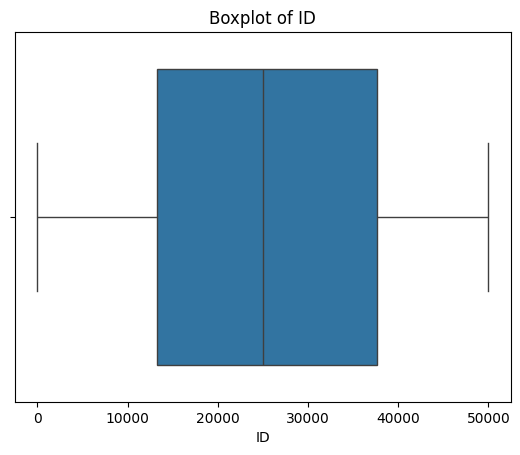

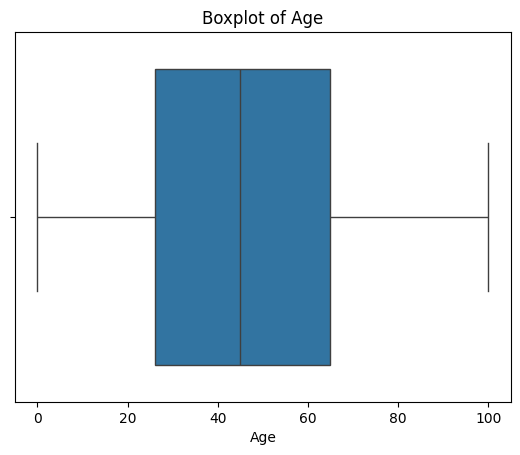

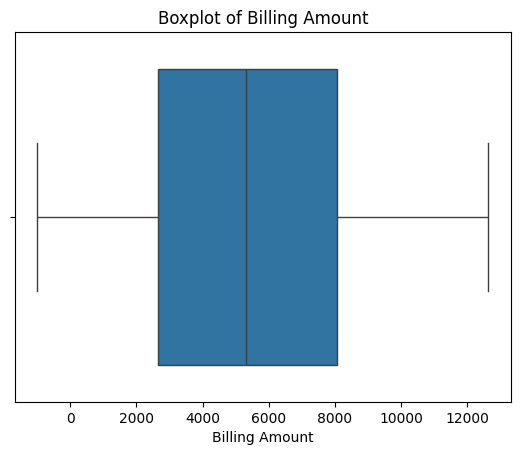

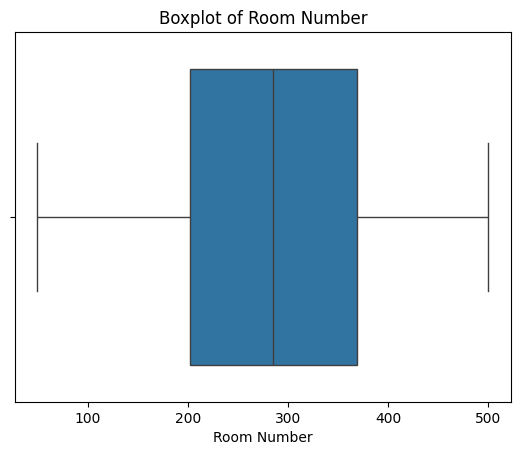

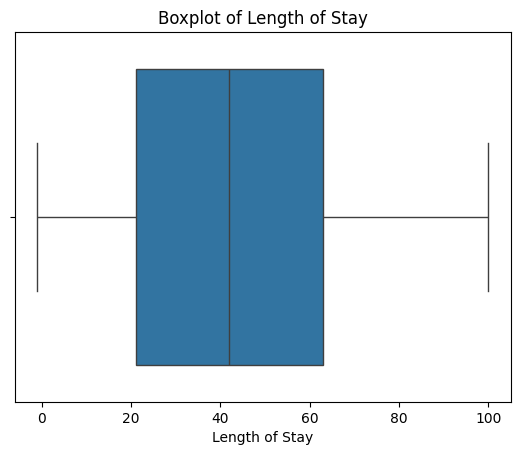

In [28]:
look_for_outliers(df_cleaned)

In [29]:
# List of numerical features
numerical_features = df_cleaned.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Apply the function to handle outliers
df = handle_outliers_iqr(df_cleaned, numerical_features)

Feature: ID, Outliers Detected: 0
 - Lower Bound: -23493.50, Upper Bound: 74402.50

Feature: Age, Outliers Detected: 0
 - Lower Bound: -32.50, Upper Bound: 123.50

Feature: Billing Amount, Outliers Detected: 0
 - Lower Bound: -5466.46, Upper Bound: 16171.74

Feature: Room Number, Outliers Detected: 0
 - Lower Bound: -48.50, Upper Bound: 619.50

Feature: Length of Stay, Outliers Detected: 0
 - Lower Bound: -42.00, Upper Bound: 126.00



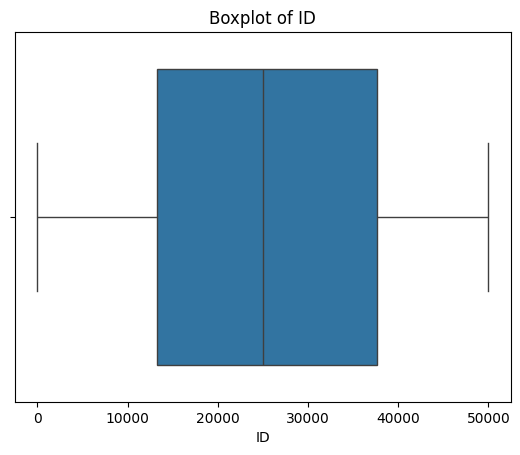

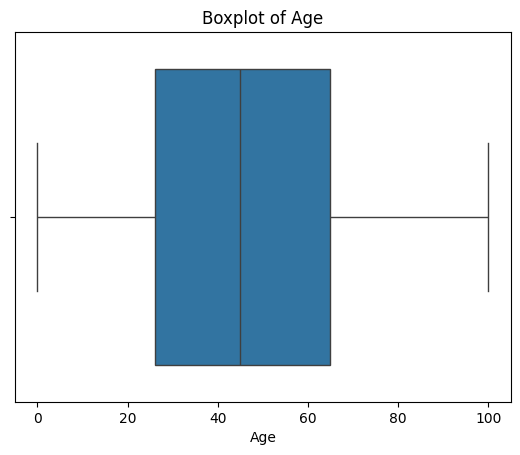

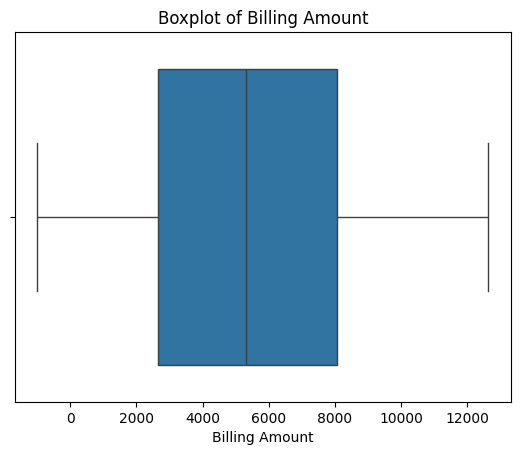

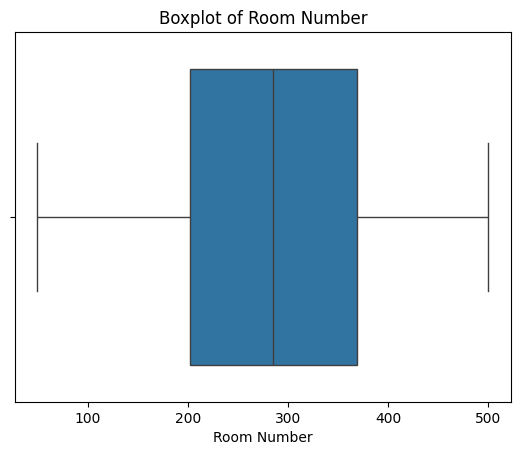

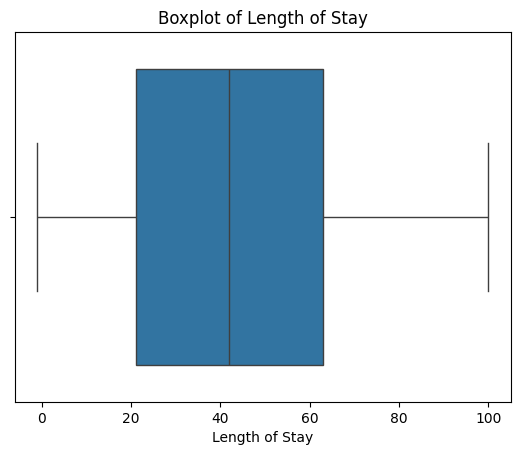

In [30]:
look_for_outliers(df)

In [31]:
pd.set_option('display.max_rows', None)  #this line to show all of the records
df_dtypes = pd.DataFrame({"Feature": df.columns, "Data Type": df.dtypes})
print(df_dtypes)
pd.reset_option('display.max_rows')

                               Feature       Data Type
ID                                  ID         float64
Name                              Name          object
Age                                Age         float64
Gender                          Gender          object
Blood Type                  Blood Type          object
Medical Condition    Medical Condition          object
Date of Admission    Date of Admission  datetime64[ns]
Doctor                          Doctor          object
Hospital                      Hospital          object
Insurance Provider  Insurance Provider          object
Billing Amount          Billing Amount         float64
Room Number                Room Number         float64
Admission Type          Admission Type          object
Discharge Date          Discharge Date  datetime64[ns]
Medication                  Medication          object
Length of Stay          Length of Stay         float64
Test Results              Test Results          object


In [32]:
# Drop ID and Name (optional)
df.drop(columns=['ID', 'Name', 'Room Number'], inplace=True)

X_encoded, y_encoded = encode_features(df, target_col="Test Results")
df = pd.concat([X_encoded, y_encoded.rename("Test Results")], axis=1)

c:\Users\Fady\Desktop\Healthcare Results Predictions - Machine Learning\Healthcare-test-results-classification-using-ML\utils\encoding.py:22: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_encoded = df_encoded.replace(binary_map)


Blood Type has 8 unique features
Medical Condition has 6 unique features
Doctor has 217 unique features
Hospital has 60 unique features
Insurance Provider has 5 unique features
Medication has 5 unique features


In [33]:
pd.set_option('display.max_rows', None)  #this line to show all of the records
df_dtypes = pd.DataFrame({"Feature": df.columns, "Data Type": df.dtypes})
print(df_dtypes)
pd.reset_option('display.max_rows')

                                                                 Feature  \
Age                                                                  Age   
Gender                                                            Gender   
Date of Admission                                      Date of Admission   
Doctor                                                            Doctor   
Hospital                                                        Hospital   
Billing Amount                                            Billing Amount   
Admission Type                                            Admission Type   
Discharge Date                                            Discharge Date   
Length of Stay                                            Length of Stay   
Blood Type_A+                                              Blood Type_A+   
Blood Type_A-                                              Blood Type_A-   
Blood Type_AB+                                            Blood Type_AB+   
Blood Type_A

In [34]:
df.head()

,Age,Gender,Date of Admission,Doctor,Hospital,Billing Amount,Admission Type,Discharge Date,Length of Stay,Blood Type_A+,...,Insurance Provider_Blue Cross,Insurance Provider_Cigna,Insurance Provider_Medicare,Insurance Provider_Unitedhealthcare,Medication_Aspirin,Medication_Ibuprofen,Medication_Lipitor,Medication_Paracetamol,Medication_Penicillin,Test Results
0,27.0,1,2022-06-06,0.962422,1.022167,2625.980554,0,2022-08-18,73.0,False,...,False,True,False,False,False,True,False,False,False,2
1,68.0,1,2021-11-19,1.110902,0.990571,1471.387317,0,2021-11-20,1.0,False,...,False,True,False,False,False,True,False,False,False,1
2,21.0,1,2022-03-05,1.052795,1.274194,5131.488104,2,2022-05-16,72.0,True,...,False,False,True,False,False,False,False,True,False,2
3,91.0,0,2020-04-06,1.098401,0.838558,8972.793157,1,2020-04-26,20.0,False,...,True,False,False,False,False,True,False,False,False,0
4,52.0,1,2022-12-31,0.725309,0.809061,2015.522684,2,2023-02-11,42.0,True,...,True,False,False,False,False,False,False,False,True,0


In [35]:
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_features = [col for col in numerical_features if col != 'Test Results']

df, skewed_features, transformation_details = treat_skewness(df, numerical_features)

Found 1 skewed continuous features: ['Hospital']
Hospital transformed using Square Root


In [36]:
df, scaled_cols = scale_features(df, target_col='Test Results', scaler_type='standard')

[INFO] Numerical columns: ['Age', 'Gender', 'Doctor', 'Hospital', 'Billing Amount', 'Admission Type', 'Length of Stay']
[INFO] Continuous columns selected for scaling: ['Age', 'Billing Amount', 'Length of Stay']
[INFO] Using StandardScaler
[SUCCESS] Scaled features: ['Age', 'Billing Amount', 'Length of Stay']


In [37]:
numeric_desc = df.describe()
print("Descriptive Statistics (Numeric Columns):")
print(numeric_desc)

Descriptive Statistics (Numeric Columns):
                Age        Gender              Date of Admission  \
count  4.416700e+04  44167.000000                          44167   
mean  -8.333397e-17      0.570245  2022-02-14 15:55:40.475920896   
min   -1.881465e+00      0.000000            2019-04-02 00:00:00   
25%   -8.142416e-01      0.000000            2020-09-06 00:00:00   
50%   -3.434731e-02      1.000000            2022-02-13 00:00:00   
75%    7.865941e-01      1.000000            2023-07-27 00:00:00   
max    2.223241e+00      1.000000            2024-12-31 00:00:00   
std    1.000011e+00      0.495047                            NaN   

             Doctor      Hospital  Billing Amount  Admission Type  \
count  44167.000000  44167.000000    4.416700e+04    44167.000000   
mean       1.009411      0.997483    2.033478e-16        1.028211   
min        0.310959      0.664156   -1.970346e+00        0.000000   
25%        0.792899      0.918028   -8.503936e-01        1.000000   


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44167 entries, 0 to 49999
Data columns (total 34 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Age                                  44167 non-null  float64       
 1   Gender                               44167 non-null  int64         
 2   Date of Admission                    44167 non-null  datetime64[ns]
 3   Doctor                               44167 non-null  float64       
 4   Hospital                             44167 non-null  float64       
 5   Billing Amount                       44167 non-null  float64       
 6   Admission Type                       44167 non-null  int64         
 7   Discharge Date                       44167 non-null  datetime64[ns]
 8   Length of Stay                       44167 non-null  float64       
 9   Blood Type_A+                        44167 non-null  bool          
 10  Blood Type_A-  

In [39]:
print(df.columns.tolist())

['Age', 'Gender', 'Date of Admission', 'Doctor', 'Hospital', 'Billing Amount', 'Admission Type', 'Discharge Date', 'Length of Stay', 'Blood Type_A+', 'Blood Type_A-', 'Blood Type_AB+', 'Blood Type_AB-', 'Blood Type_B+', 'Blood Type_B-', 'Blood Type_O+', 'Blood Type_O-', 'Medical Condition_Arthritis', 'Medical Condition_Asthma', 'Medical Condition_Cancer', 'Medical Condition_Diabetes', 'Medical Condition_Hypertension', 'Medical Condition_Obesity', 'Insurance Provider_Aetna', 'Insurance Provider_Blue Cross', 'Insurance Provider_Cigna', 'Insurance Provider_Medicare', 'Insurance Provider_Unitedhealthcare', 'Medication_Aspirin', 'Medication_Ibuprofen', 'Medication_Lipitor', 'Medication_Paracetamol', 'Medication_Penicillin', 'Test Results']
